# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [118]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
# List of dataframes
dataframes = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

In [6]:
for df in dataframes:
    print(f"{df} shape:", df.shape)

      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns] shape: (29322, 3)
      Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5


In [7]:
for df in dataframes:
    print(f"{df} columns:", df.columns)

      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns] columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
      Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1


In [8]:
for df in dataframes:
    print(f"NaN values in {df}:")
    print(df.isnull().sum())

NaN values in       Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]:
Geographic Area     0
City                0
Median Income      51
dtype: int64
NaN values in       Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL       

In [9]:
for df in dataframes:
    print(f"Duplicates in {df}:", df.duplicated().sum())
    print("\n" + "="*50 + "\n") 

Duplicates in       Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]: 0


Duplicates in       Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville cit

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [11]:
for df in dataframes:
    # Replace NaN values with 0
    df.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [23]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'].replace('[^\d.]', '', regex=True), errors='coerce')
average_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
sorted_poverty_by_state = average_poverty_by_state.sort_values(by='poverty_rate', ascending=False)

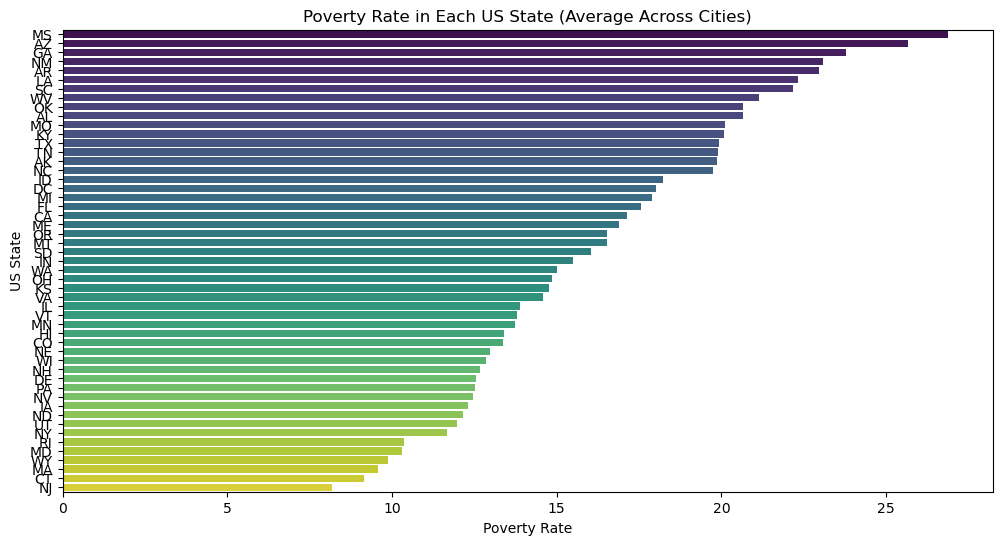

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='poverty_rate', y='Geographic Area', data=sorted_poverty_by_state, palette='viridis')
plt.xlabel('Poverty Rate')
plt.ylabel('US State')
plt.title('Poverty Rate in Each US State (Average Across Cities)')

plt.savefig('poverty_rate_by_state.png')
plt.show()

In [27]:
highest_poverty_state = sorted_poverty_by_state.iloc[0]['Geographic Area']
lowest_poverty_state = sorted_poverty_by_state.iloc[-1]['Geographic Area']

print(f"The state with the highest poverty rate is: {highest_poverty_state}")
print(f"The state with the lowest poverty rate is: {lowest_poverty_state}")

The state with the highest poverty rate is: MS
The state with the lowest poverty rate is: NJ


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [33]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
avg_hs_graduation_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()
avg_hs_graduation_by_state = avg_hs_graduation_by_state.sort_values(by='percent_completed_hs')


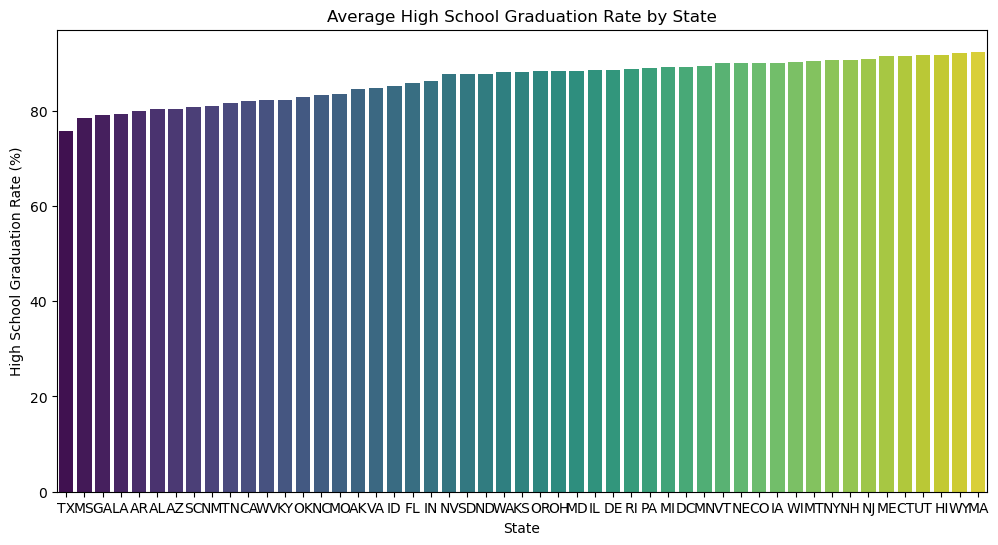

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Geographic Area', y='percent_completed_hs', data=avg_hs_graduation_by_state, palette='viridis')

plt.xlabel('State')
plt.ylabel('High School Graduation Rate (%)')
plt.title('Average High School Graduation Rate by State')

plt.savefig('hs_graduation_rate_by_state.png')
plt.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

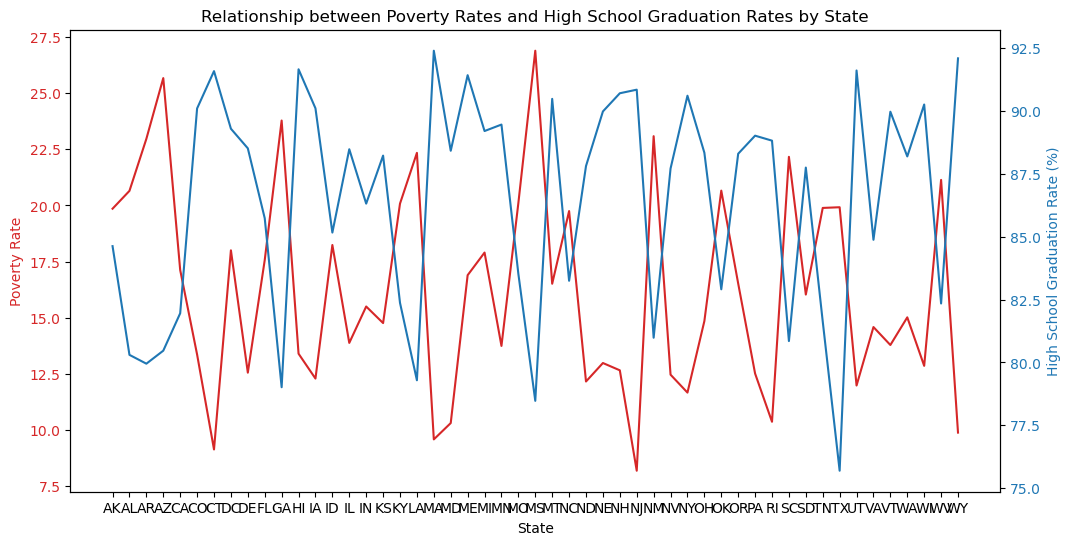

In [36]:
merged_df = pd.merge(average_poverty_by_state, avg_hs_graduation_by_state, on='Geographic Area')
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the poverty rates on the left y-axis
color = 'tab:red'
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color=color)
ax1.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for high school graduation rates
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rate (%)', color=color)
ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Relationship between Poverty Rates and High School Graduation Rates by State')
plt.savefig('poverty_hs_relationship.png')
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

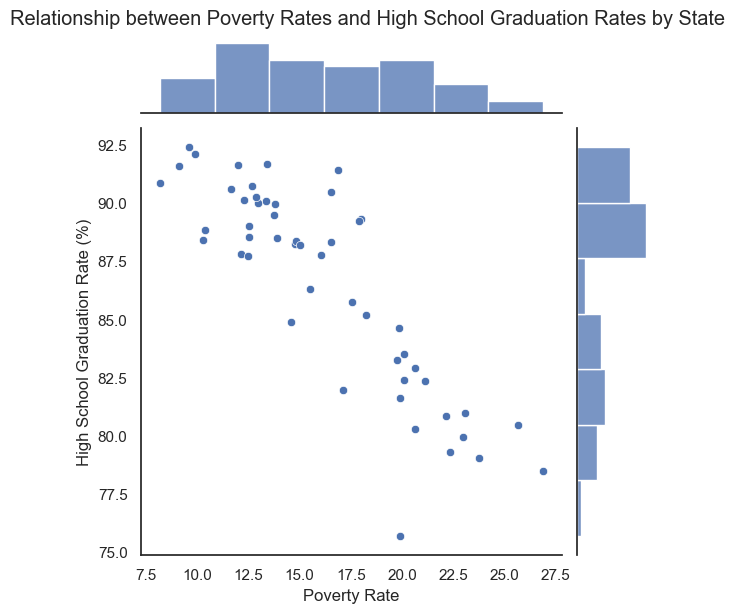

In [40]:
import seaborn as sns
merged_df = pd.merge(average_poverty_by_state, avg_hs_graduation_by_state, on='Geographic Area')

sns.set(style="white", color_codes=True)
g = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, kind='scatter', color='b')

g.set_axis_labels('Poverty Rate', 'High School Graduation Rate (%)')
g.fig.suptitle('Relationship between Poverty Rates and High School Graduation Rates by State', y=1.02)

g.savefig('poverty_hs_jointplot.png')
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

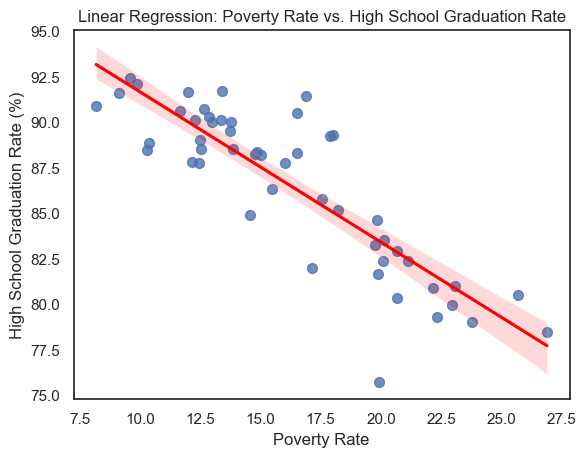

In [43]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})


plt.xlabel('Poverty Rate')
plt.ylabel('High School Graduation Rate (%)')
plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate')

plt.savefig('linear_regression_poverty_hs.png')
plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [69]:
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[race_columns] = df_share_race_city[race_columns].apply(pd.to_numeric, errors='coerce')
avg_race_shares_by_state = df_share_race_city.groupby('Geographic area')[race_columns].mean().reset_index()


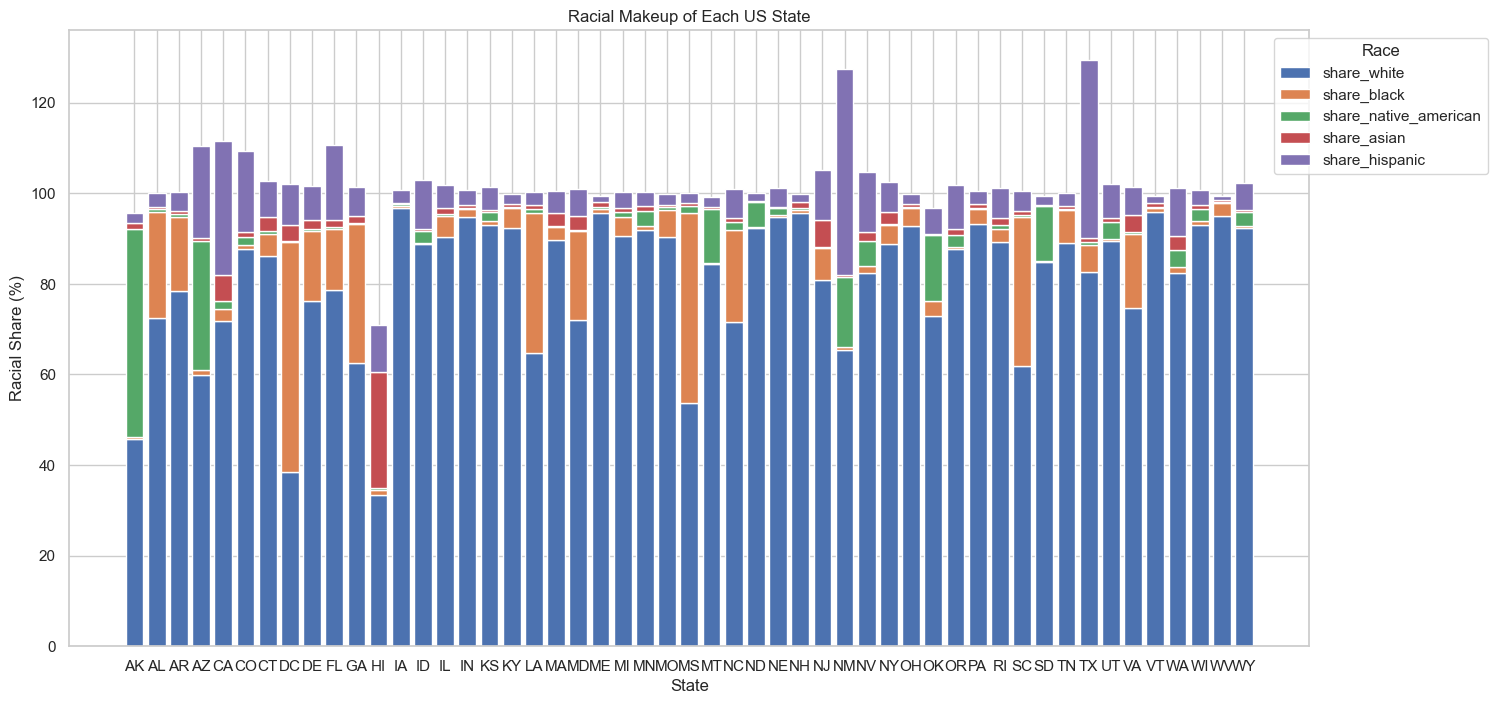

In [70]:
plt.figure(figsize=(16, 8))
bottoms = np.zeros(len(avg_race_shares_by_state))

for race in race_columns:
    plt.bar(avg_race_shares_by_state['Geographic area'], avg_race_shares_by_state[race], label=race, bottom=bottoms)
    bottoms += avg_race_shares_by_state[race]


plt.xlabel('State')
plt.ylabel('Racial Share (%)')
plt.title('Racial Makeup of Each US State')
plt.legend(title='Race', loc='upper right', bbox_to_anchor=(1.15, 1))


plt.savefig('racial_makeup_by_state.png', bbox_inches='tight')
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

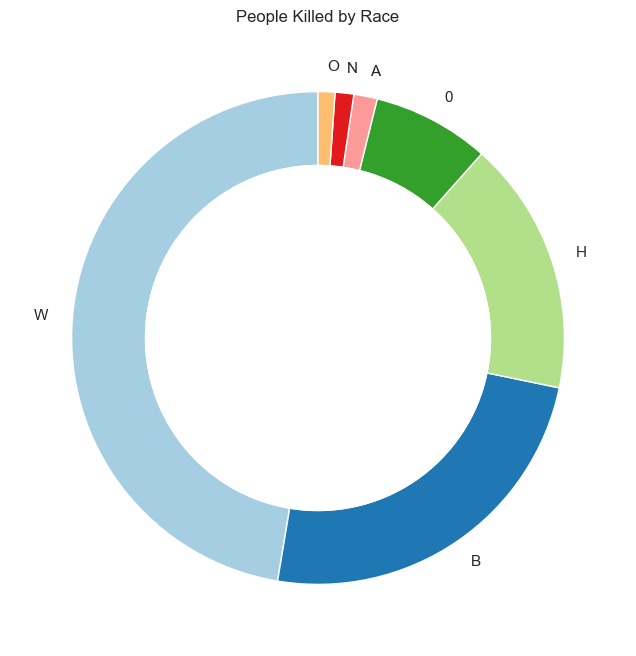

In [77]:
race_counts = df_fatalities['race'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct=None, startangle=90, wedgeprops=dict(width=0.3), colors=plt.cm.Paired.colors)
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))

plt.title('People Killed by Race')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

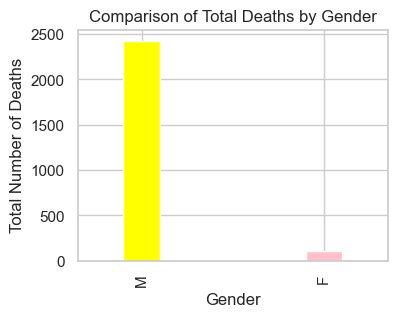

In [84]:
gender_counts = df_fatalities['gender'].value_counts()

plt.figure(figsize=(4, 3))
gender_counts.plot(kind='bar', color=['yellow', 'pink'], width=0.2)  # Adjust width to make bars thinner

plt.xlabel('Gender')
plt.ylabel('Total Number of Deaths')
plt.title('Comparison of Total Deaths by Gender')

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

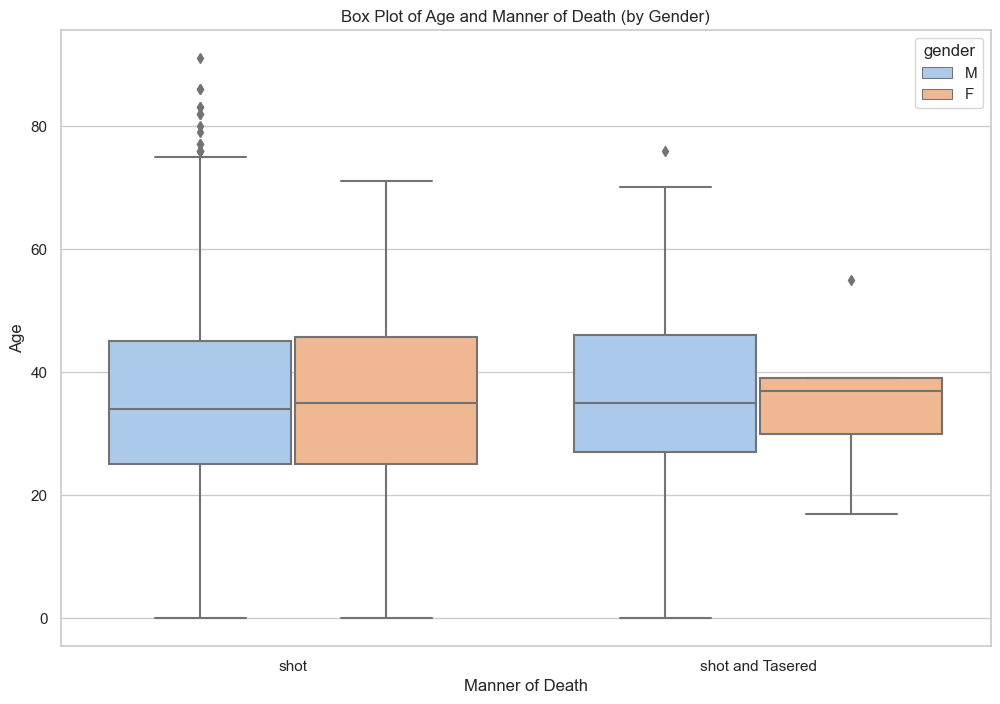

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities, palette='pastel')

plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.title('Box Plot of Age and Manner of Death (by Gender)')


plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

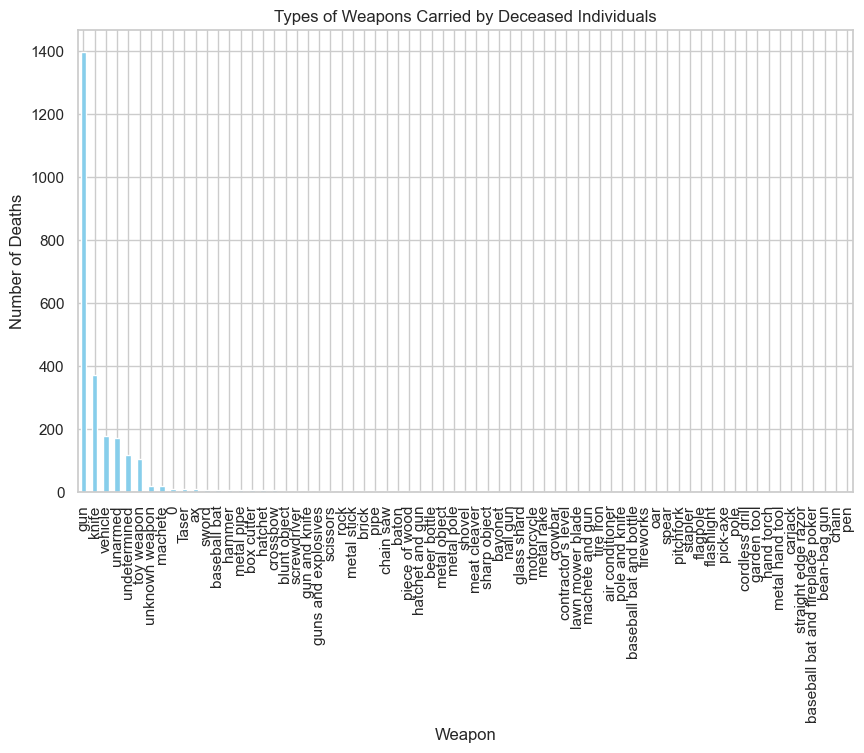

Percentage of police killings where people were armed: 93.25%


In [93]:
armed_percentage = (df_fatalities['armed'] != 'unarmed').sum() / len(df_fatalities) * 100
weapon_counts = df_fatalities['armed'].value_counts()

plt.figure(figsize=(10, 6))
weapon_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weapon')
plt.ylabel('Number of Deaths')
plt.title('Types of Weapons Carried by Deceased Individuals')
plt.show()

print(f"Percentage of police killings where people were armed: {armed_percentage:.2f}%")

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [94]:
under_25_percentage = (df_fatalities['age'] < 25).sum() / len(df_fatalities) * 100
print(f"Percentage of people killed under 25 years old: {under_25_percentage:.2f}%")

Percentage of people killed under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

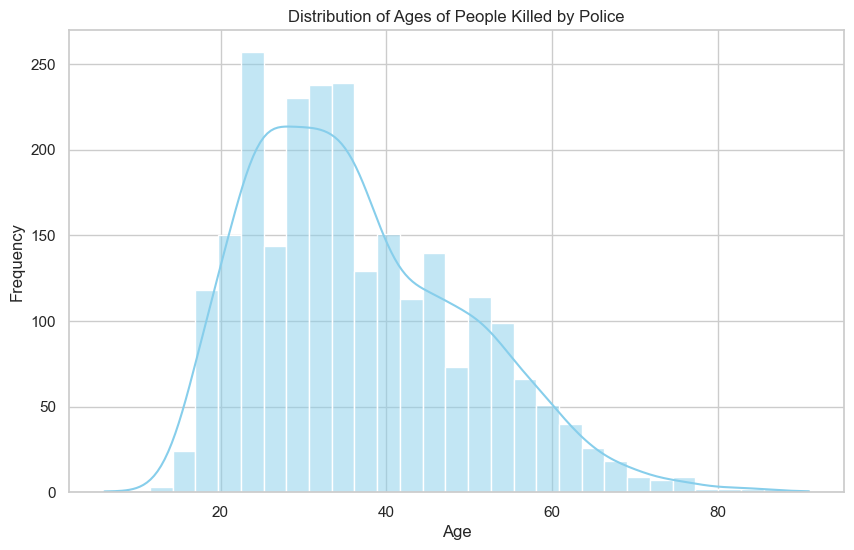

In [98]:
filtered_df = df_fatalities[df_fatalities['age'] > 0]
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['age'], kde=True, color='skyblue')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of People Killed by Police')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

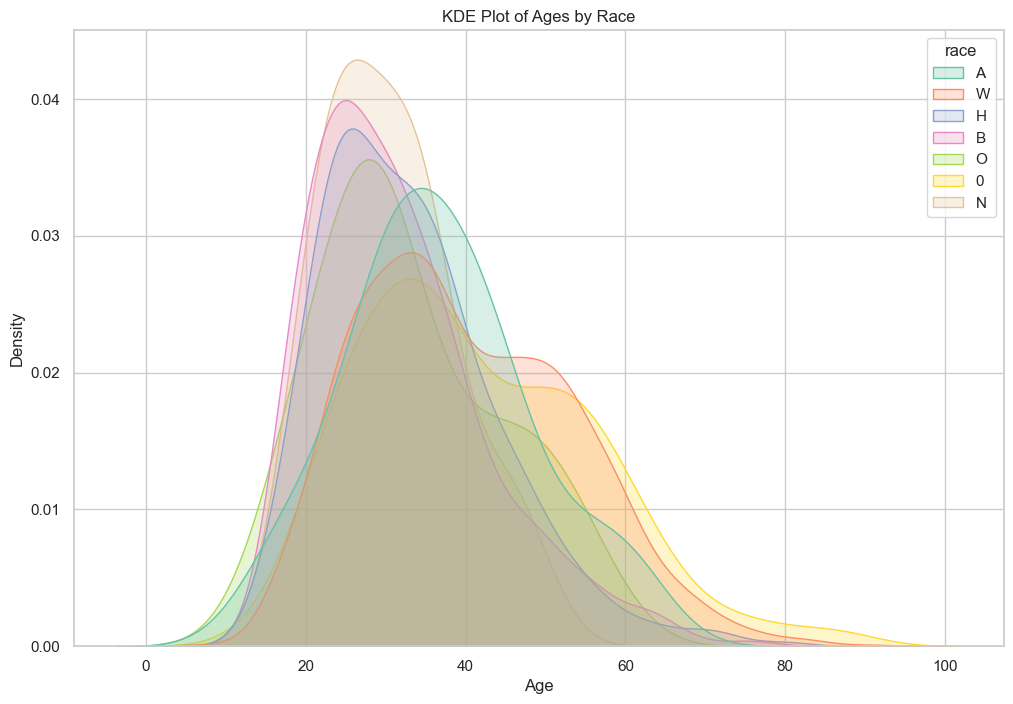

In [101]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=filtered_df, x='age', hue='race', fill=True, common_norm=False, palette='Set2')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Ages by Race')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

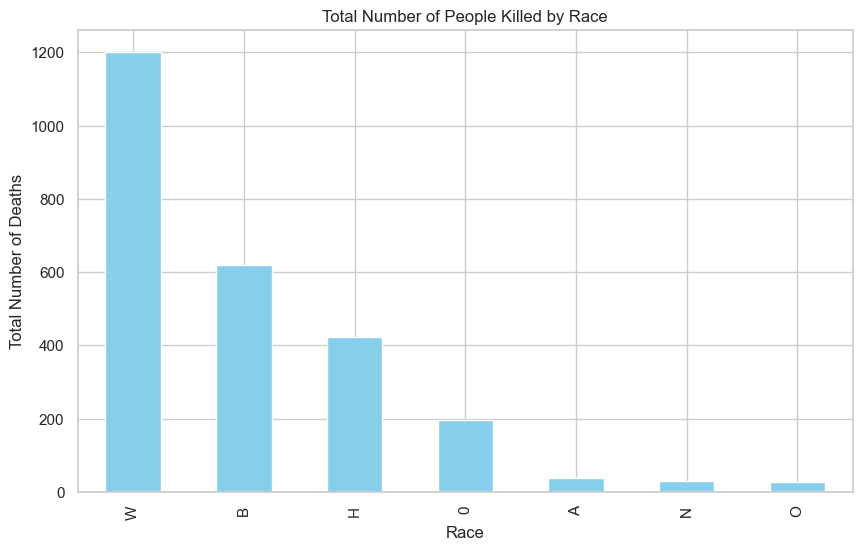

In [103]:
race_counts = df_fatalities['race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Race')
plt.ylabel('Total Number of Deaths')
plt.title('Total Number of People Killed by Race')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [104]:
mental_illness_percentage = (df_fatalities['signs_of_mental_illness'] == True).sum() / len(df_fatalities) * 100

print(f"Percentage of people killed with a diagnosed mental illness: {mental_illness_percentage:.2f}%")

Percentage of people killed with a diagnosed mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

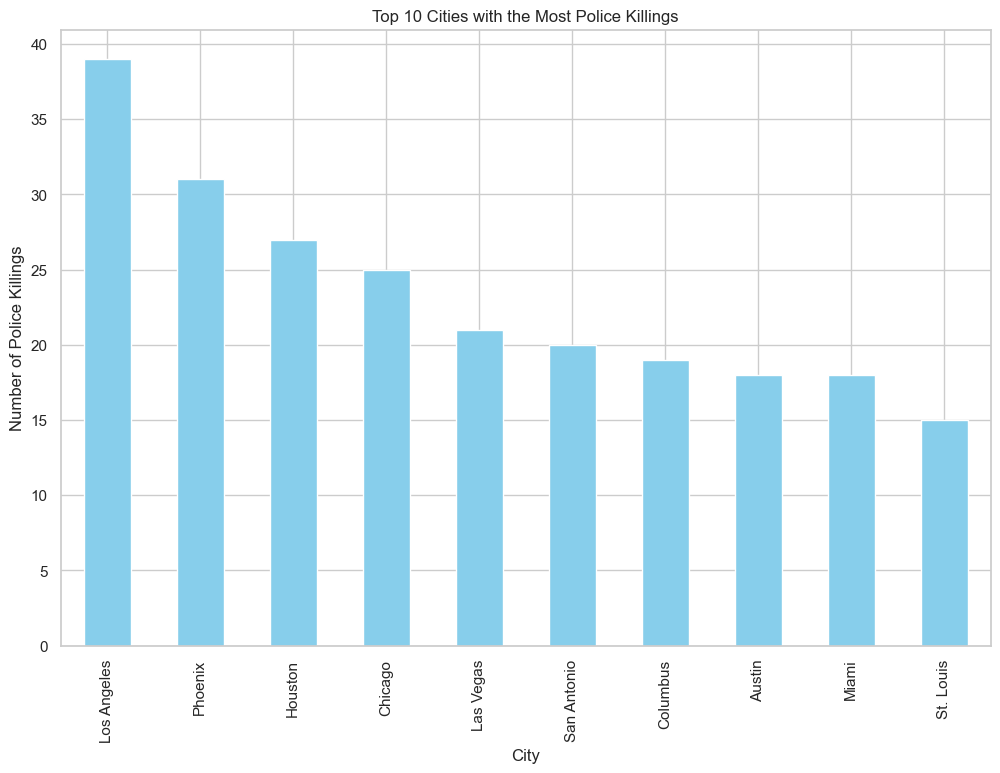

In [106]:
top_cities = df_fatalities['city'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar', color='skyblue')

plt.xlabel('City')
plt.ylabel('Number of Police Killings')
plt.title('Top 10 Cities with the Most Police Killings')

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [109]:
top_10_cities = df_fatalities['city'].value_counts().nlargest(10).index
df_top_10_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

race_share_top_10_cities = df_top_10_cities['race'].value_counts(normalize=True) * 100
print("Share of each race that people are killed in the top 10 cities:")
print(race_share_top_10_cities)

Share of each race that people are killed in the top 10 cities:
race
B   37.34
H   26.61
W   25.75
0    7.30
N    1.72
A    0.86
O    0.43
Name: proportion, dtype: float64


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

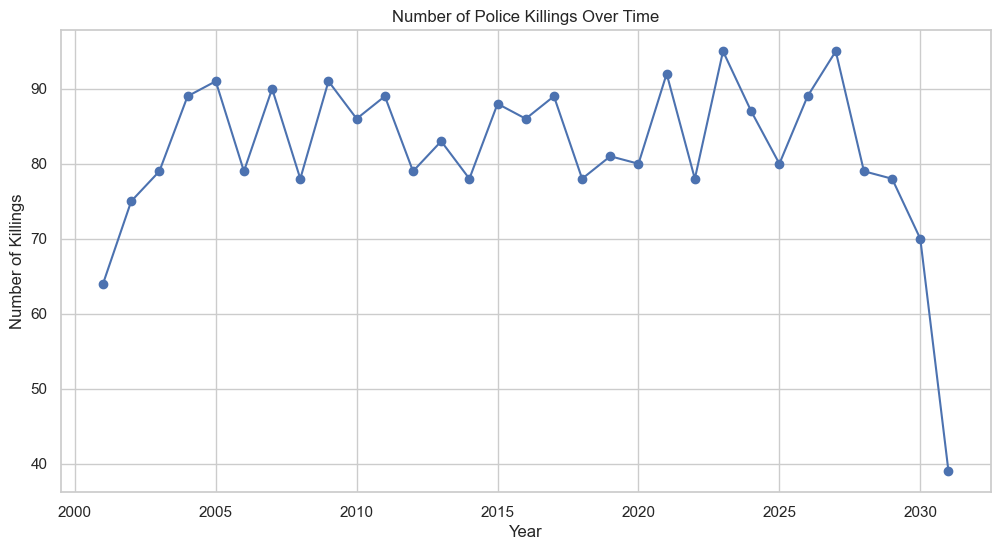

In [124]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%y/%m/%d')
df_fatalities['year'] = df_fatalities['date'].dt.year
killings_by_year = df_fatalities.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(killings_by_year.index, killings_by_year.values, marker='o', linestyle='-')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.grid(True)
plt.show()



In [122]:
# 查看 'year' 变量的唯一值数量
num_unique_years = df_fatalities['date'].nunique()

# 打印唯一值数量
print(f"Number of unique years: {num_unique_years}")


Number of unique years: 879


In [123]:
unique_years = df_fatalities['date'].unique()

# 打印唯一值
print(unique_years)

<DatetimeArray>
['2002-01-15 00:00:00', '2003-01-15 00:00:00', '2004-01-15 00:00:00',
 '2005-01-15 00:00:00', '2006-01-15 00:00:00', '2007-01-15 00:00:00',
 '2008-01-15 00:00:00', '2009-01-15 00:00:00', '2011-01-15 00:00:00',
 '2013-01-15 00:00:00',
 ...
 '2020-07-17 00:00:00', '2021-07-17 00:00:00', '2023-07-17 00:00:00',
 '2024-07-17 00:00:00', '2025-07-17 00:00:00', '2026-07-17 00:00:00',
 '2027-07-17 00:00:00', '2028-07-17 00:00:00', '2029-07-17 00:00:00',
 '2031-07-17 00:00:00']
Length: 879, dtype: datetime64[ns]
